In [1]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv("/content/Twitter Sentiments.csv")

In [3]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
def preprocess_text(text):
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove special characters, usernames, and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    # Lowercase the text
    text = text.lower()
    return text

In [5]:
df['tweet'] = df['tweet'].apply(preprocess_text)

In [6]:
df

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...


In [28]:
tweet=df['tweet']
target=df['label']

In [34]:
def create_corpus(target):
    corpus=[]

    for x in df[df['label']==target]['tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [35]:
corpus_new1=create_corpus(1)
len(corpus_new1)

30481

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

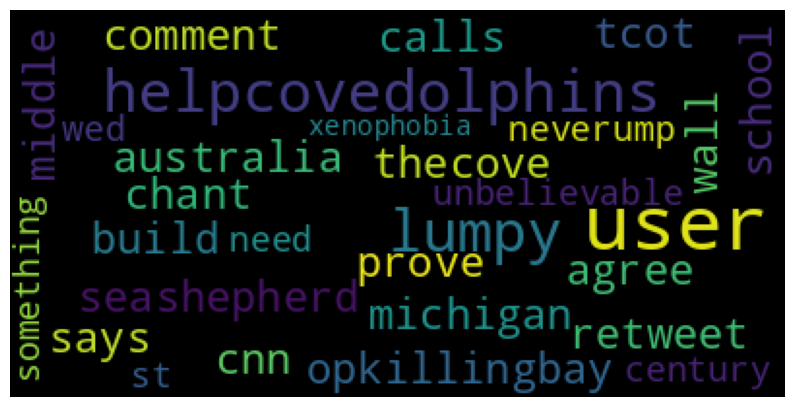

In [37]:
plt.figure(figsize=(10,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 40
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [38]:
corpus_new0=create_corpus(0)
len(corpus_new0)

370062

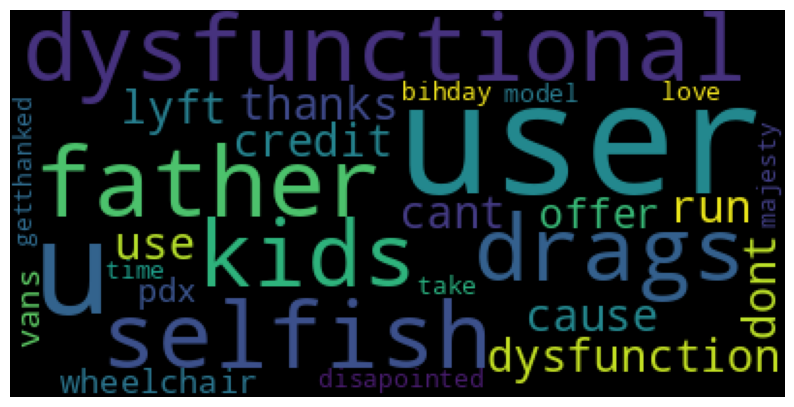

In [40]:
plt.figure(figsize=(10,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## BOW


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
bow_vectorizer = CountVectorizer(binary=True)
bow_features = bow_vectorizer.fit_transform(df['tweet'])

In [ ]:
bow_vectorizer.vocabulary_

In [ ]:
print(bow_features.shape)

(31962, 39770)


In [ ]:
bow_features

<31962x39770 sparse matrix of type '<class 'numpy.int64'>'
	with 358624 stored elements in Compressed Sparse Row format>

## TF-IDF

In [ ]:

tfidf_vectorizer= TfidfVectorizer(ngram_range=(2,3))
tfidf_features=tfidf_vectorizer.fit_transform(df['tweet'])

In [ ]:
tfidf_vectorizer.vocabulary_

In [ ]:
# tfidf_features=tfidf_features.toarray()

## MODELS

## Logistic Regression

BOW

In [ ]:
X_train_bow_lr, X_test_bow_lr, y_train_bow_lr, y_test_bow_lr = train_test_split(bow_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
lr_bow = LogisticRegression()

In [ ]:
lr_bow.fit(X_train_bow_lr, y_train_bow_lr)

LogisticRegression()

In [ ]:
pred_train_bow_lr = lr_bow.predict(X_train_bow_lr)
pred_test_bow_lr = lr_bow.predict(X_test_bow_lr)

In [ ]:
accuracy_train_bow_lr = accuracy_score(y_train_bow_lr, pred_train_bow_lr)
accuracy_test_bow_lr = accuracy_score(y_test_bow_lr, pred_test_bow_lr)

In [ ]:
print("Bag-of-Words (BOW) Accuracy - Train: {:.2f}%, Test: {:.2f}%".format(accuracy_train_bow_lr * 100, accuracy_test_bow_lr * 100))

Bag-of-Words (BOW) Accuracy - Train: 98.47%, Test: 96.03%


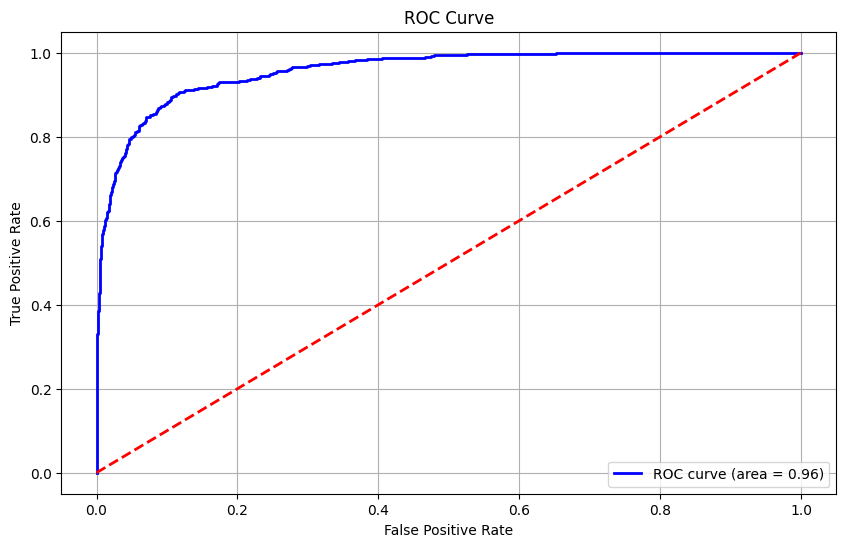

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities for positive class
probabilities = lr_bow.predict_proba(X_test_bow_lr)
positive_probabilities = probabilities[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_bow_lr, positive_probabilities)

# Compute area under the curve (AUC)
roc_auc = roc_auc_score(y_test_bow_lr, positive_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)


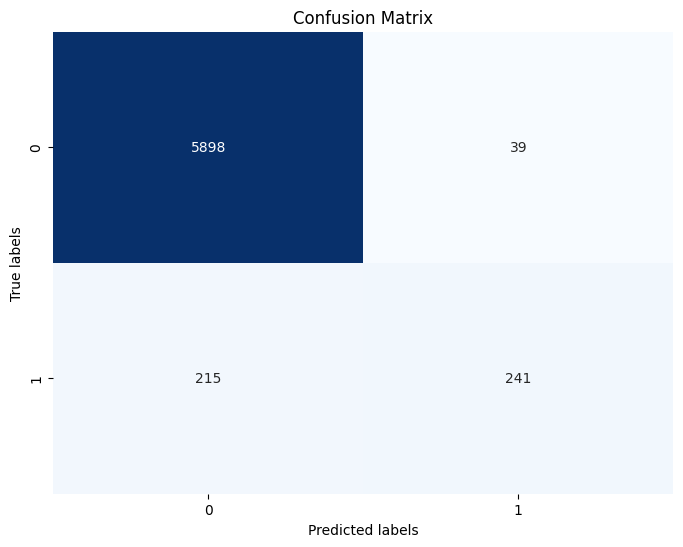

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_bow_lr, pred_test_bow_lr)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


TF-IDF

In [ ]:
X_train_tfidf_lr, X_test_tfidf_lr, y_train_tfidf_lr, y_test_tfidf_lr = train_test_split(tfidf_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf_lr, y_train_tfidf_lr)

LogisticRegression()

In [ ]:
pred_train_tfidf_lr = lr_tfidf.predict(X_train_tfidf_lr)
pred_test_tfidf_lr = lr_tfidf.predict(X_test_tfidf_lr)

In [ ]:
accuracy_train_tfidf_lr = accuracy_score(y_train_tfidf_lr, pred_train_tfidf_lr)
accuracy_test_tfidf_lr = accuracy_score(y_test_tfidf_lr, pred_test_tfidf_lr)

In [ ]:
print("TF-IDF Accuracy - Train: {:.2f}%, Test: {:.2f}%".format(accuracy_train_tfidf_lr * 100, accuracy_test_tfidf_lr * 100))

TF-IDF Accuracy - Train: 93.84%, Test: 93.59%


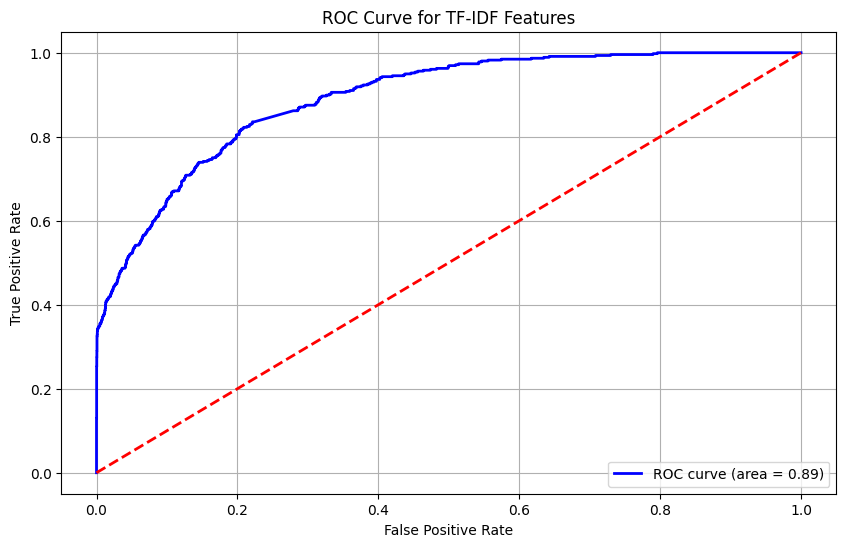

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities for positive class
probabilities_tfidf = lr_tfidf.predict_proba(X_test_tfidf_lr)
positive_probabilities_tfidf = probabilities_tfidf[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test_tfidf_lr, positive_probabilities_tfidf)

# Compute area under the curve (AUC)
roc_auc_tfidf = roc_auc_score(y_test_tfidf_lr, positive_probabilities_tfidf)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_tfidf, tpr_tfidf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tfidf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for TF-IDF Features')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


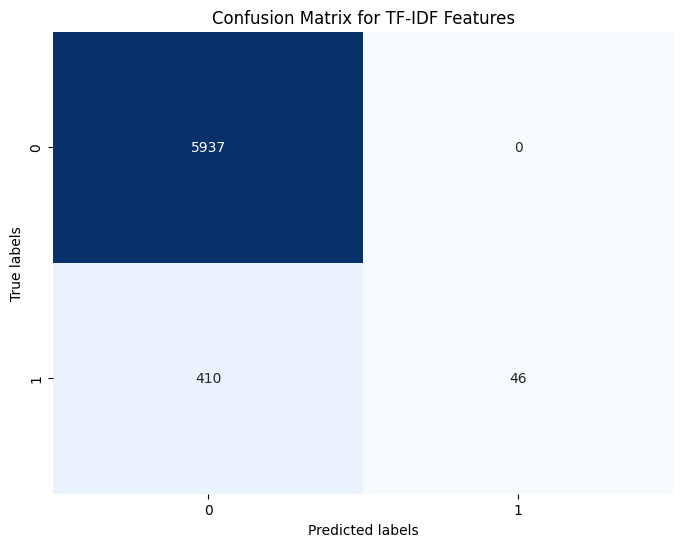

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix_tfidf = confusion_matrix(y_test_tfidf_lr, pred_test_tfidf_lr)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for TF-IDF Features')
plt.show()


## CNN

BOW

In [ ]:
# X_train_bow_cnn, X_test_bow_cnn, y_train_bow_cnn, y_test_bow_cnn = train_test_split(bow_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_bow_cnn, X_test_bow_cnn, y_train, y_test = train_test_split(bow_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_bow_seq_cnn = pad_sequences(X_train_bow_cnn.toarray(), maxlen=250,padding='post')  # Assuming max length of 100
X_test_bow_seq_cnn = pad_sequences(X_test_bow_cnn.toarray(), maxlen=250,padding='post')

In [ ]:
cnn_model = Sequential([
    Embedding(input_dim=X_train_bow_seq_cnn.shape[1], output_dim=100, input_length=250),  # Input shape based on BOW sequence length
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.fit(X_train_bow_seq_cnn, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
640/640 [==============================] - 9s 6ms/step - loss: 0.2584 - accuracy: 0.9293 - val_loss: 0.2584 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 3s 5ms/step - loss: 0.2538 - accuracy: 0.9306 - val_loss: 0.2594 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 4s 6ms/step - loss: 0.2536 - accuracy: 0.9306 - val_loss: 0.2580 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 4s 6ms/step - loss: 0.2536 - accuracy: 0.9306 - val_loss: 0.2639 - val_accuracy: 0.9284
Epoch 5/5
640/640 [==============================] - 3s 5ms/step - loss: 0.2539 - accuracy: 0.9306 - val_loss: 0.2583 - val_accuracy: 0.9284


In [ ]:
loss_bow_cnn, accuracy_bow_cnn = cnn_model.evaluate(X_test_bow_seq_cnn, y_test)
print("BOW - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_bow_cnn, accuracy_bow_cnn))


200/200 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9287
BOW - Test Loss: 0.2576, Test Accuracy: 0.9287


200/200 [==============================] - 1s 4ms/step


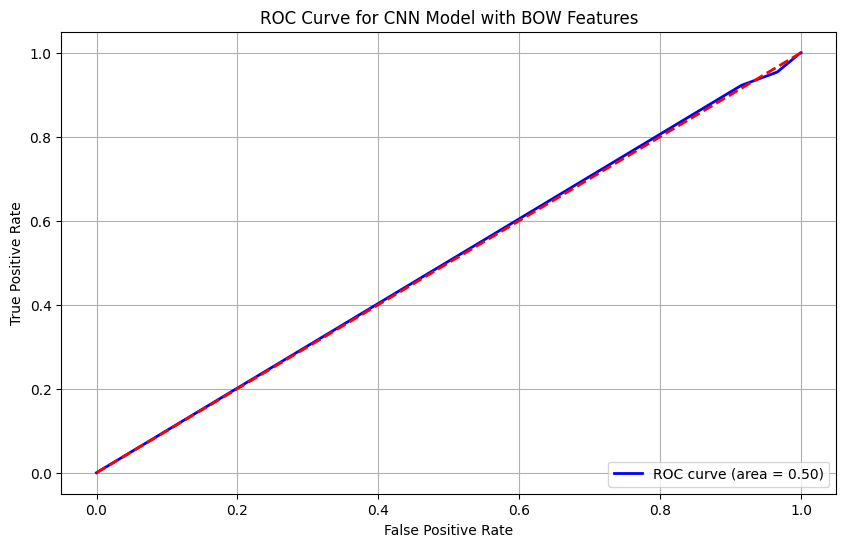

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_bow_cnn = cnn_model.predict(X_test_bow_seq_cnn)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_bow_cnn, tpr_bow_cnn, thresholds_bow_cnn = roc_curve(y_test, probabilities_bow_cnn)

# Calculate the area under the curve (AUC)
roc_auc_bow_cnn = roc_auc_score(y_test, probabilities_bow_cnn)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_bow_cnn, tpr_bow_cnn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bow_cnn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model with BOW Features')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


200/200 [==============================] - 1s 4ms/step


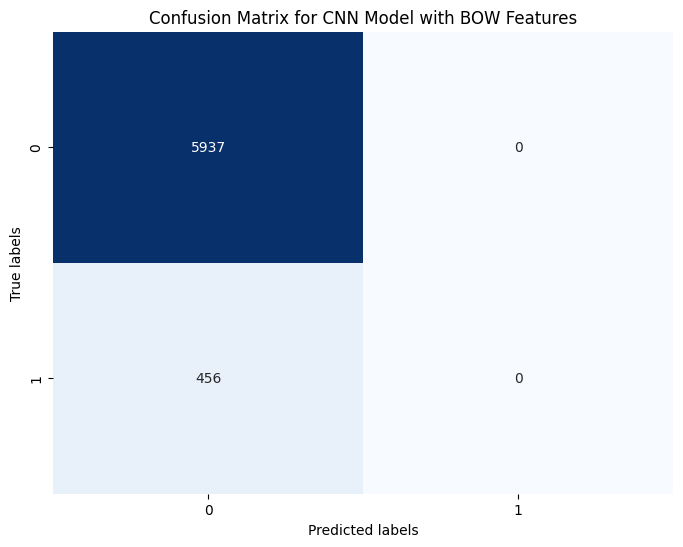

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_bow_cnn = cnn_model.predict(X_test_bow_seq_cnn)

# Threshold probabilities to get predicted classes
predictions_bow_cnn = (probabilities_bow_cnn > 0.5).astype(int)

# Confusion Matrix
conf_matrix_bow_cnn = confusion_matrix(y_test, predictions_bow_cnn)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CNN Model with BOW Features')
plt.show()


TF-IDF

In [ ]:
# X_train_tfidf_cnn, X_test_tfidf_cnn, y_train_tfidf_cnn,y_test_tfidf_cnn = train_test_split(tfidf_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_tfidf_cnn, X_test_tfidf_cnn, y_train,y_test = train_test_split(tfidf_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_tfidf_seq_cnn = pad_sequences(X_train_tfidf_cnn.toarray(), maxlen=250)  # Assuming max length of 100
X_test_tfidf_seq_cnn = pad_sequences(X_test_tfidf_cnn.toarray(), maxlen=250)

In [ ]:
cnn_model_tfidf = Sequential([
    Embedding(input_dim=X_train_tfidf_seq_cnn.shape[1], output_dim=100, input_length=250),  # Input shape based on BOW sequence length
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

In [ ]:
cnn_model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model_tfidf.fit(X_train_tfidf_seq_cnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
640/640 [==============================] - 5s 7ms/step - loss: 0.2602 - accuracy: 0.9306 - val_loss: 0.2580 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 3s 5ms/step - loss: 0.2542 - accuracy: 0.9306 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 3s 5ms/step - loss: 0.2540 - accuracy: 0.9306 - val_loss: 0.2582 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 4s 6ms/step - loss: 0.2543 - accuracy: 0.9306 - val_loss: 0.2590 - val_accuracy: 0.9284
Epoch 5/5
640/640 [==============================] - 3s 5ms/step - loss: 0.2537 - accuracy: 0.9306 - val_loss: 0.2580 - val_accuracy: 0.9284


In [ ]:
# Evaluate the model with TF-IDF representation
loss_tfidf_cnn, accuracy_tfidf_cnn = cnn_model.evaluate(X_test_tfidf_seq_cnn, y_test)
print("TF-IDF - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_tfidf_cnn, accuracy_tfidf_cnn))

200/200 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9287
TF-IDF - Test Loss: 0.2576, Test Accuracy: 0.9287


200/200 [==============================] - 1s 5ms/step


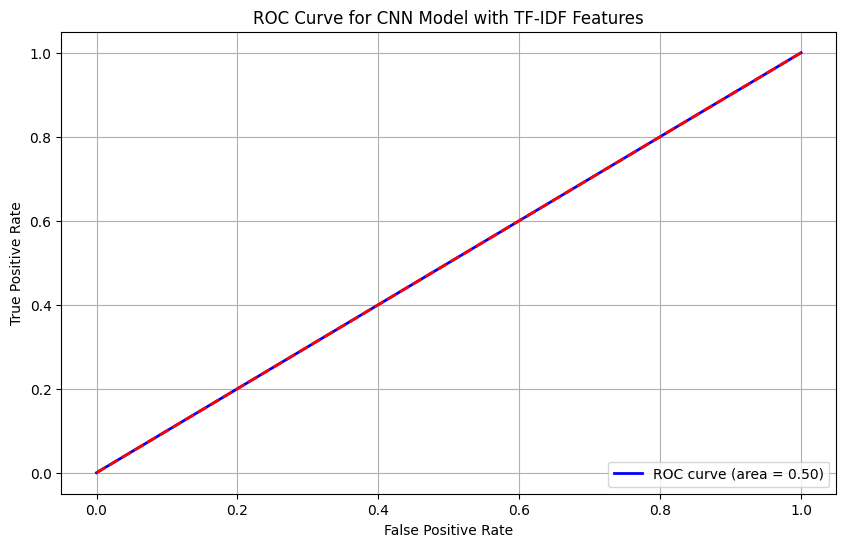

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_tfidf_cnn = cnn_model_tfidf.predict(X_test_tfidf_seq_cnn)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_tfidf_cnn, tpr_tfidf_cnn, thresholds_tfidf_cnn = roc_curve(y_test, probabilities_tfidf_cnn)

# Calculate the area under the curve (AUC)
roc_auc_tfidf_cnn = roc_auc_score(y_test, probabilities_tfidf_cnn)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_tfidf_cnn, tpr_tfidf_cnn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tfidf_cnn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model with TF-IDF Features')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


200/200 [==============================] - 1s 3ms/step


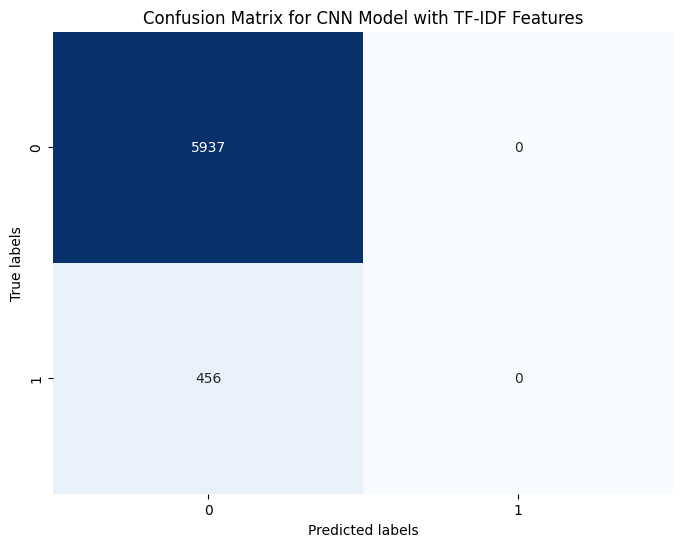

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_tfidf_cnn = cnn_model_tfidf.predict(X_test_tfidf_seq_cnn)

# Threshold probabilities to get predicted classes
predictions_tfidf_cnn = (probabilities_tfidf_cnn > 0.5).astype(int)

# Confusion Matrix
conf_matrix_tfidf_cnn = confusion_matrix(y_test, predictions_tfidf_cnn)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CNN Model with TF-IDF Features')
plt.show()


## LSTM

BOW

In [ ]:
# X_train_bow_lstm, X_test_bow_lstm, y_train_bow_lstm, y_test_bow_lstm = train_test_split(bow_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_bow_lstm, X_test_bow_lstm, y_train, y_test = train_test_split(bow_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_bow_seq_lstm = pad_sequences(X_train_bow_lstm.toarray(), maxlen=250,padding='post')  # Assuming max length of 100
X_test_bow_seq_lstm = pad_sequences(X_test_bow_lstm.toarray(), maxlen=250,padding='post')

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=X_train_bow_seq_lstm.shape[1], output_dim=100, input_length=250),  # Input shape based on BOW sequence length
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_model.fit(X_train_bow_seq_lstm, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
640/640 [==============================] - 12s 15ms/step - loss: 0.2578 - accuracy: 0.9306 - val_loss: 0.2584 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2528 - accuracy: 0.9306 - val_loss: 0.2589 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2528 - accuracy: 0.9306 - val_loss: 0.2581 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2526 - accuracy: 0.9306 - val_loss: 0.2578 - val_accuracy: 0.9284
Epoch 5/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2525 - accuracy: 0.9306 - val_loss: 0.2577 - val_accuracy: 0.9284


In [ ]:
loss_bow_lstm, accuracy_bow_lstm = cnn_model.evaluate(X_test_bow_seq_lstm, y_test)
print("BOW - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_bow_lstm, accuracy_bow_lstm))

200/200 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9287
BOW - Test Loss: 0.2576, Test Accuracy: 0.9287


200/200 [==============================] - 2s 7ms/step


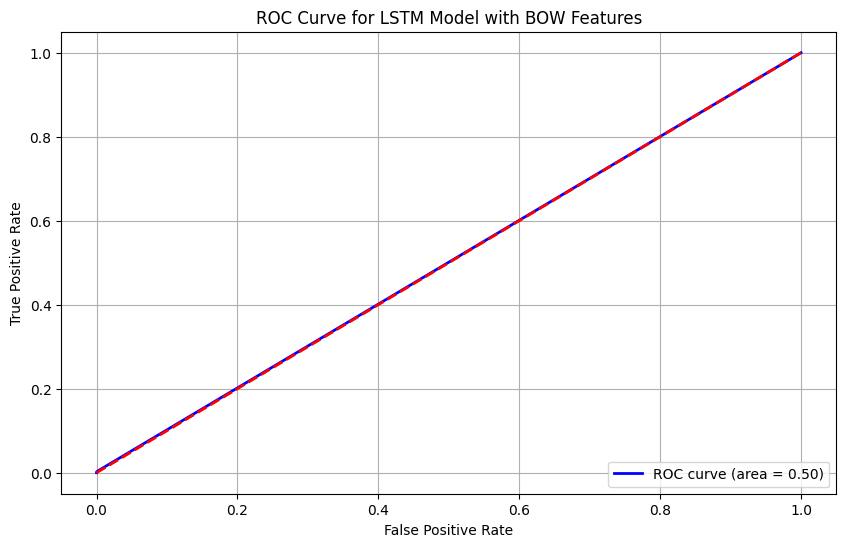

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_bow_lstm = lstm_model.predict(X_test_bow_seq_lstm)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_bow_lstm, tpr_bow_lstm, thresholds_bow_lstm = roc_curve(y_test, probabilities_bow_lstm)

# Calculate the area under the curve (AUC)
roc_auc_bow_lstm = roc_auc_score(y_test, probabilities_bow_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_bow_lstm, tpr_bow_lstm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bow_lstm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model with BOW Features')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


200/200 [==============================] - 1s 7ms/step


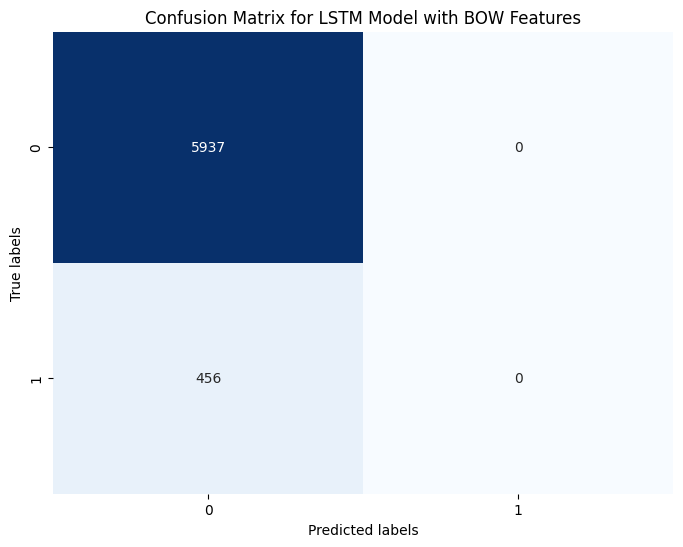

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_bow_lstm = lstm_model.predict(X_test_bow_seq_lstm)

# Threshold probabilities to get predicted classes
predictions_bow_lstm = (probabilities_bow_lstm > 0.5).astype(int)

# Confusion Matrix
conf_matrix_bow_lstm = confusion_matrix(y_test, predictions_bow_lstm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow_lstm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LSTM Model with BOW Features')
plt.show()


TF-IDF

In [ ]:
X_train_tfidf, X_test_tfidf, y_train,y_test = train_test_split(tfidf_features, df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_tfidf_seq = pad_sequences(X_train_tfidf.toarray(), maxlen=250)  # Assuming max length of 100
X_test_tfidf_seq = pad_sequences(X_test_tfidf.toarray(), maxlen=250)

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=X_train_tfidf_seq.shape[1], output_dim=100, input_length=250),  # Input shape based on BOW sequence length
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_model.fit(X_train_tfidf_seq, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
640/640 [==============================] - 11s 14ms/step - loss: 0.2596 - accuracy: 0.9291 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2527 - accuracy: 0.9306 - val_loss: 0.2578 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2528 - accuracy: 0.9306 - val_loss: 0.2582 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2527 - accuracy: 0.9306 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 5/5
640/640 [==============================] - 8s 13ms/step - loss: 0.2525 - accuracy: 0.9306 - val_loss: 0.2583 - val_accuracy: 0.9284


In [ ]:
loss_tfidf, accuracy_tfidf = cnn_model.evaluate(X_test_tfidf_seq, y_test)
print("TF-IDF - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss_tfidf, accuracy_tfidf))

200/200 [==============================] - 1s 4ms/step - loss: 0.2576 - accuracy: 0.9287
TF-IDF - Test Loss: 0.2576, Test Accuracy: 0.9287


200/200 [==============================] - 1s 6ms/step


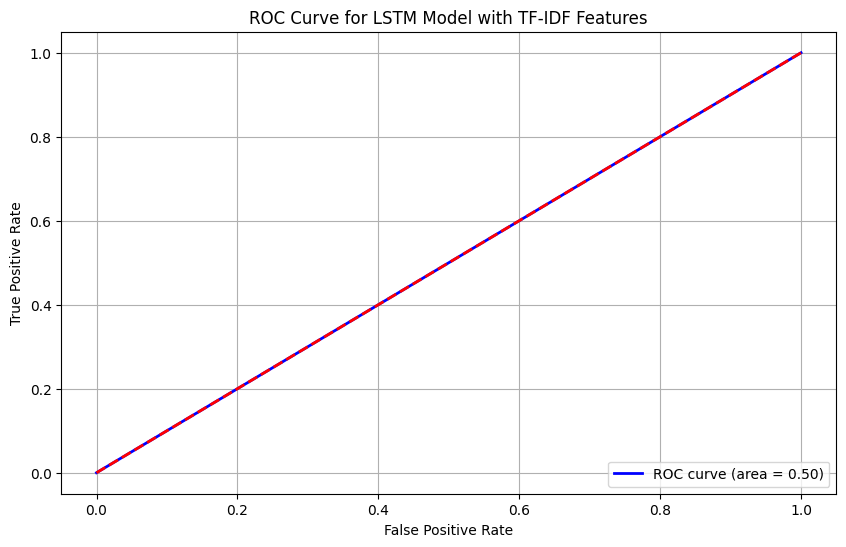

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_tfidf_lstm = lstm_model.predict(X_test_tfidf_seq)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_tfidf_lstm, tpr_tfidf_lstm, thresholds_tfidf_lstm = roc_curve(y_test, probabilities_tfidf_lstm)

# Calculate the area under the curve (AUC)
roc_auc_tfidf_lstm = roc_auc_score(y_test, probabilities_tfidf_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_tfidf_lstm, tpr_tfidf_lstm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tfidf_lstm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model with TF-IDF Features')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


200/200 [==============================] - 2s 8ms/step


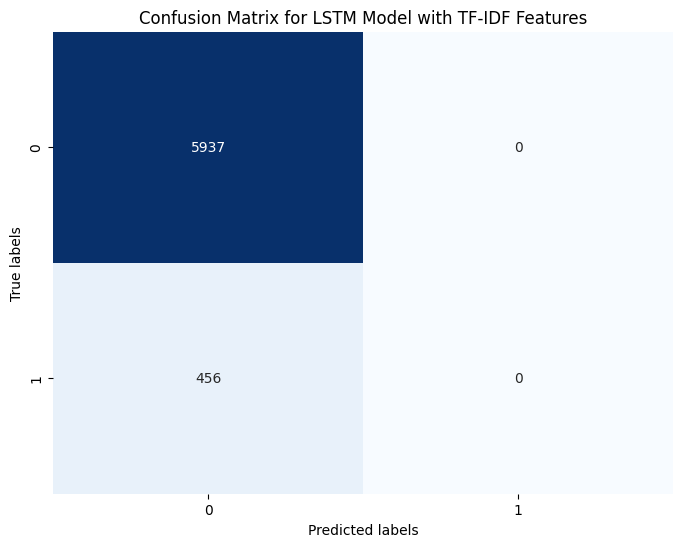

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities_tfidf_lstm = lstm_model.predict(X_test_tfidf_seq)

# Threshold probabilities to get predicted classes
predictions_tfidf_lstm = (probabilities_tfidf_lstm > 0.5).astype(int)

# Confusion Matrix
conf_matrix_tfidf_lstm = confusion_matrix(y_test, predictions_tfidf_lstm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lstm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LSTM Model with TF-IDF Features')
plt.show()


## metrics


In [ ]:
# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, f1

In [ ]:
lr_accuracy_bow, lr_precision, lr_f1 = evaluate_model(y_test_bow_lr, pred_test_bow_lr)

cnn_loss, cnn_accuracy_bow = cnn_model.evaluate(X_test_bow_seq_cnn, y_test)
lstm_loss, lstm_accuracy_bow = lstm_model.evaluate(X_test_bow_seq_lstm, y_test)

200/200 [==============================] - 1s 7ms/step - loss: 0.2576 - accuracy: 0.9287


In [ ]:
lr_accuracy_tf, lr_precision, lr_f1 = evaluate_model(y_test_tfidf_lr, pred_test_tfidf_lr)

cnn_loss, cnn_accuracy_tf = cnn_model.evaluate(X_test_tfidf_seq_cnn, y_test)
lstm_loss, lstm_accuracy_tf = lstm_model.evaluate(X_test_tfidf_seq, y_test)

200/200 [==============================] - 1s 6ms/step - loss: 0.2576 - accuracy: 0.9287


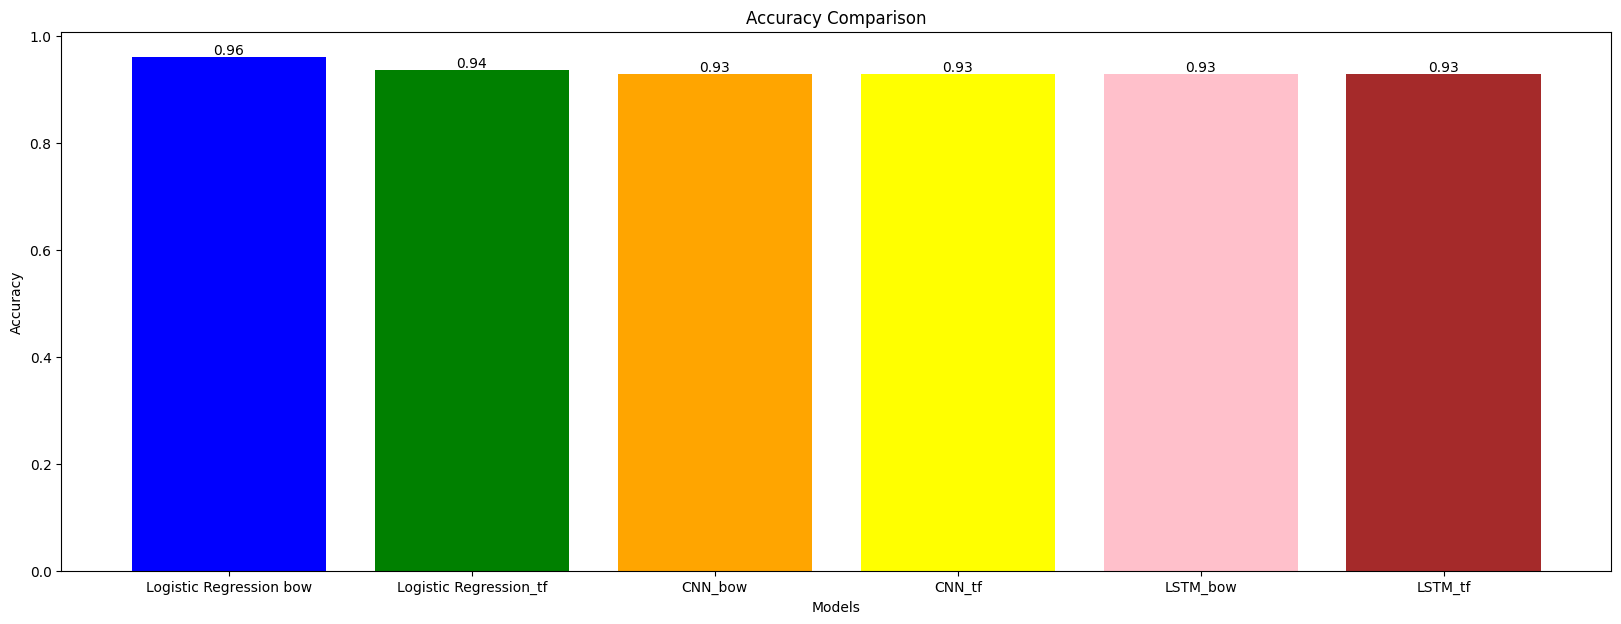

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression bow', 'Logistic Regression_tf', 'CNN_bow', 'CNN_tf', 'LSTM_bow', 'LSTM_tf']
accuracy_scores = [lr_accuracy_bow, lr_accuracy_tf , cnn_accuracy_bow, cnn_accuracy_tf, lstm_accuracy_bow, lstm_accuracy_tf]

plt.figure(figsize=(20, 7))
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'yellow', 'pink', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()
